In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import tensorflow as tf
import tensorflow_datasets as tfds

sys.path.append("../")
from models.yolo_face_detector import YoloFaceDetector

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
face_detector = YoloFaceDetector(model_path="../data/wider_face_yolo.h5",
                                 anchors_path="../data/wider_anchors.txt",
                                 classes_path="../data/wider_classes.txt")


AttributeError: 'list' object has no attribute 'load_weights'

In [ ]:
ds, ds_info = tfds.load('wider_face', split='train', with_info=True, shuffle_files=True, data_dir='../data')
assert isinstance(ds, tf.data.Dataset)
print(ds)

In [ ]:
ds_np = list(tfds.as_numpy(ds.take(10)))
example = ds_np[0]
image = example['image']
plt.imshow(image)

In [8]:
faces = face_detector.detect(image)

Face:  (x: 582, y: 89, width: 87, height: 107, score: 0.9908182621002197)


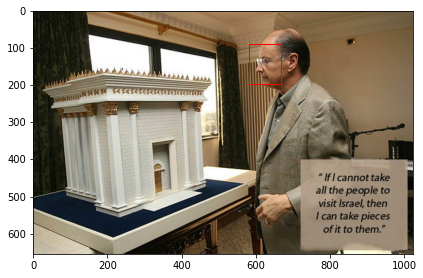

In [9]:
fig, ax = plt.subplots(1)

ax.imshow(image)

for face in faces:
  print('Face: ', face)
  rect = patches.Rectangle((face.x, face.y), face.width, face.height, edgecolor='r', facecolor='None')
  ax.add_patch(rect)

plt.tight_layout()
plt.draw()
plt.show()